In [48]:
import numpy as np
import scipy
from statsmodels.stats.proportion import proportion_confint

from matplotlib import pyplot as plt

In [49]:
def my_proportion_confint(count, nobs, alpha = 0.05, method = 'normal'):
    p = count / nobs
    std = np.sqrt(p * (1 - p) / nobs)
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    ci_low = p - z * std
    ci_upp = p + z * std
    return ci_low, ci_upp

In [50]:
my_normal_interval = my_proportion_confint(1, 50, alpha = 0.05, method = 'normal')

In [51]:
print('my_normal_interval [%f, %f] with width %f' % (my_normal_interval[0],
                                                  my_normal_interval[1], 
                                                  my_normal_interval[1] - my_normal_interval[0]))

print(my_normal_interval[0].round(4))

my_normal_interval [-0.018805, 0.058805] with width 0.077611
-0.0188


In [46]:
normal_interval = proportion_confint(1, 50, method = 'normal', alpha = 0.05)

In [47]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

print(normal_interval[0].round(4))

normal_interval [0.000000, 0.058805] with width 0.058805
0.0


In [52]:
wilson_interval = proportion_confint(1, 50, method = 'wilson', alpha = 0.05)

In [53]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1], 
                                                  wilson_interval[1] - wilson_interval[0]))

print(wilson_interval[0].round(4))

wilson_interval [0.003539, 0.104954] with width 0.101415
0.0035


In [63]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [64]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01, alpha = 0.05)))
n_samples

753

In [71]:
p_list = np.linspace(0.01, 0.99, 100000)

Text(0.5, 1.0, 'Зависимость необходимого объема выборки от p')

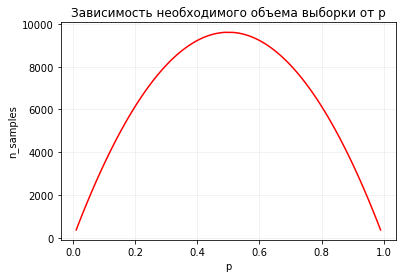

In [72]:
plt.plot(p_list, [int(np.ceil(samplesize_confint_proportion(p, 0.01, alpha = 0.05))) for p in p_list], "r-")
plt.grid(alpha = 0.2)
plt.xlabel('p')
plt.ylabel('n_samples')
plt.title('Зависимость необходимого объема выборки от p')

In [73]:
n_samples_list = [int(np.ceil(samplesize_confint_proportion(p, 0.01, alpha = 0.05))) for p in p_list]

In [74]:
n_samples_max = np.max(n_samples_list)
n_samples_max

9604